In [5]:
import pandas as pd

df = pd.read_csv("../data/global_weather_historical.csv")

In [10]:
df.head()             # 5 premières lignes
df.info()               # types de données, valeurs nulles
df.describe()           # statistiques globales
print(df.isnull().sum().sort_values(ascending=False).head())       # Vérification des valeurs manquantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80281 entries, 0 to 80280
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       80281 non-null  object 
 1   location_name                 80281 non-null  object 
 2   latitude                      80281 non-null  float64
 3   longitude                     80281 non-null  float64
 4   timezone                      80281 non-null  object 
 5   last_updated_epoch            80281 non-null  int64  
 6   last_updated                  80281 non-null  object 
 7   temperature_celsius           80281 non-null  float64
 8   temperature_fahrenheit        80281 non-null  float64
 9   condition_text                80281 non-null  object 
 10  wind_mph                      80281 non-null  float64
 11  wind_kph                      80281 non-null  float64
 12  wind_degree                   80281 non-null  int64  
 13  w

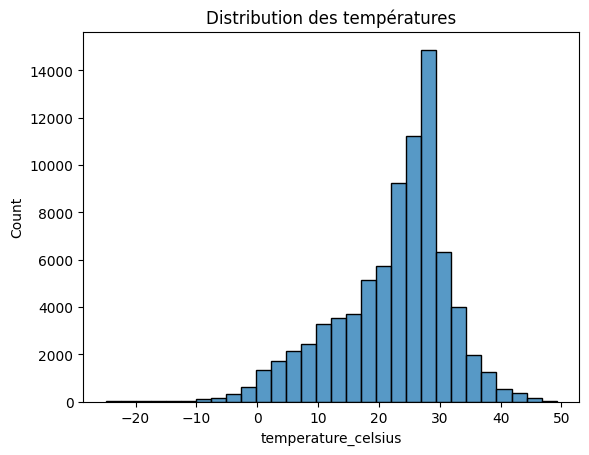

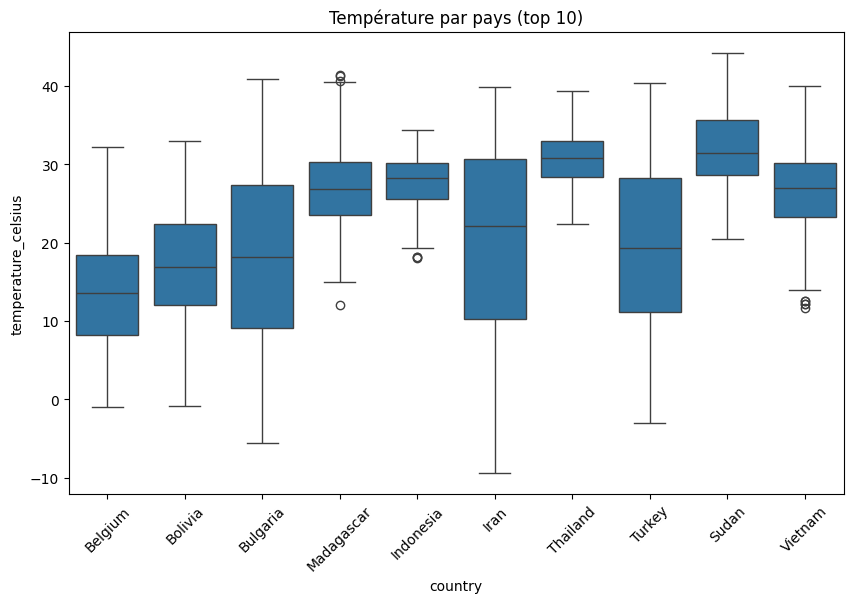

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des températures
sns.histplot(df['temperature_celsius'], bins=30)
plt.title("Distribution des températures")
plt.show()

# Température dans 10 pays
top_10 = df['country'].value_counts().head(10).index
df_filtered = df[df['country'].isin(top_10)]

plt.figure(figsize=(10,6))
sns.boxplot(x='country', y='temperature_celsius', data=df_filtered)
plt.xticks(rotation=45)
plt.title("Température par pays (top 10)")
plt.show()


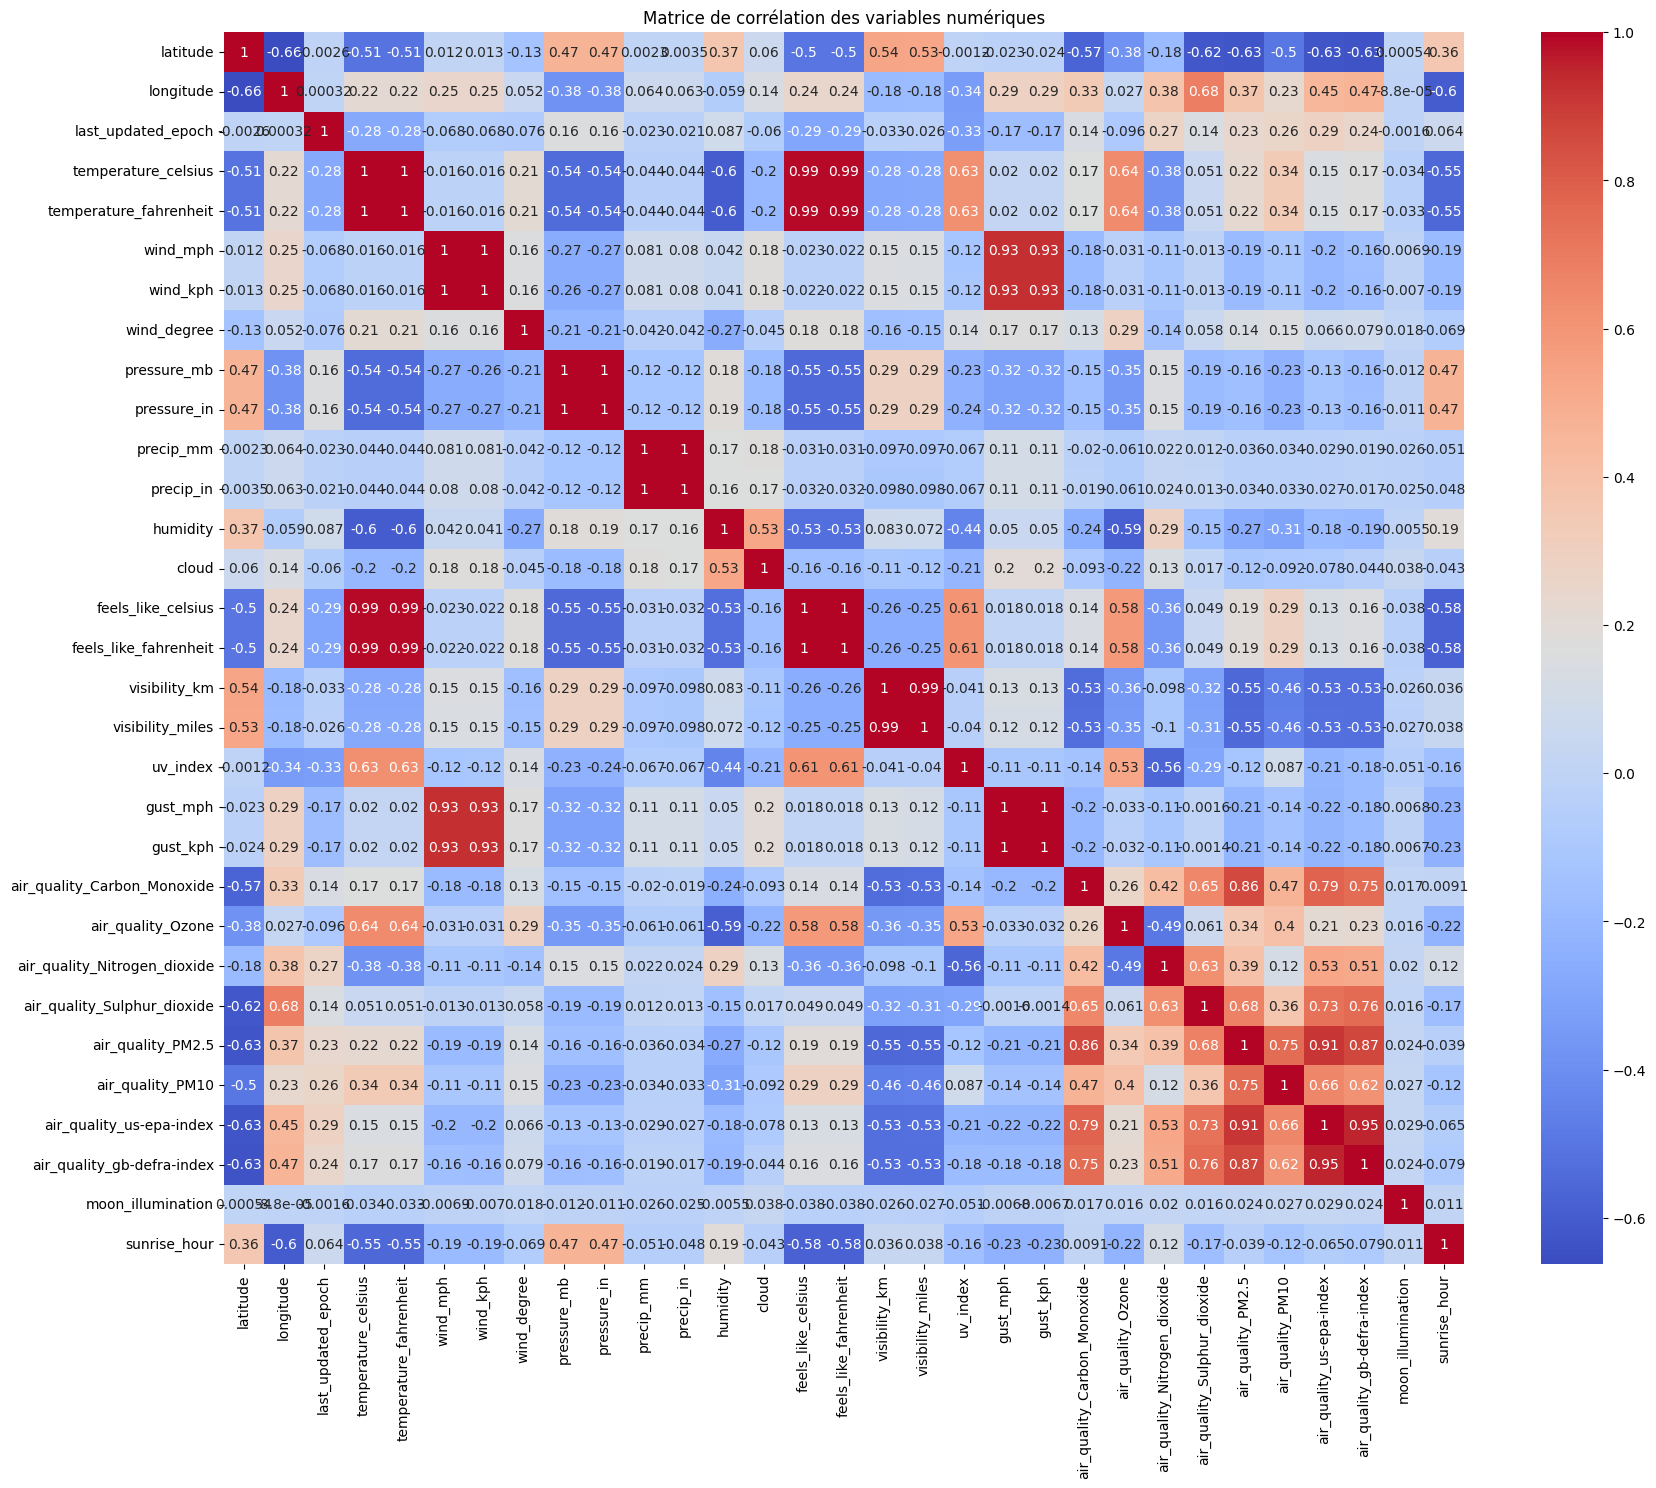

In [ ]:
# 5 pays choisis
top_countries = ['France', 'Italy', 'Spain', 'Japan', 'India']
df_filtered = df[df['country'].isin(top_countries)]

# Matrice de corrélation sur ces 10 pays
plt.figure(figsize=(20, 16))
sns.heatmap(df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques")
plt.show()


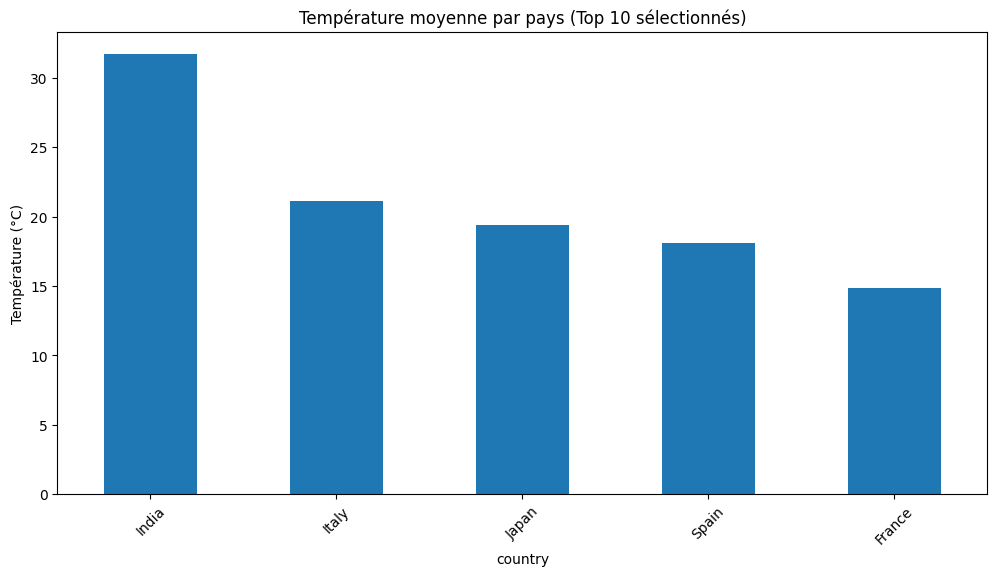

In [25]:
# Liste des 10 pays que tu veux analyser
top_countries = ['France', 'Italy', 'Spain', 'Japan', 'India']

# Filtrer le DataFrame pour ne garder que ces pays
df_filtered = df[df['country'].isin(top_countries)]

# Tracer la température moyenne par pays (parmi les 10)
plt.figure(figsize=(12,6))
df_filtered.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Température moyenne par pays (Top 10 sélectionnés)")
plt.ylabel("Température (°C)")
plt.xticks(rotation=45)
plt.show()



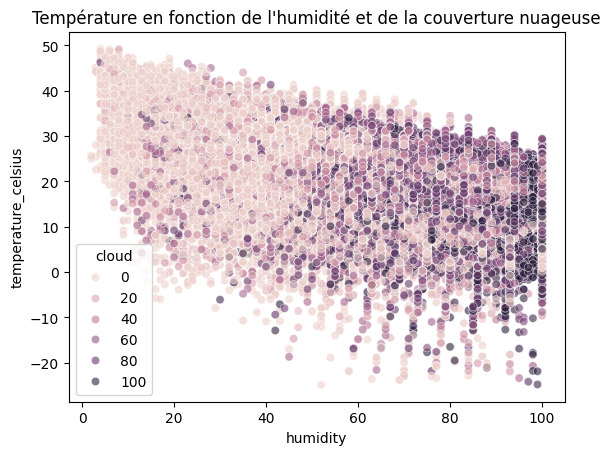

In [ ]:
# Taux de nuages, humidité et température
sns.scatterplot(data=df, x='humidity', y='temperature_celsius', hue='cloud', alpha=0.6)
plt.title("Température en fonction de l'humidité et de la couverture nuageuse")
plt.show()

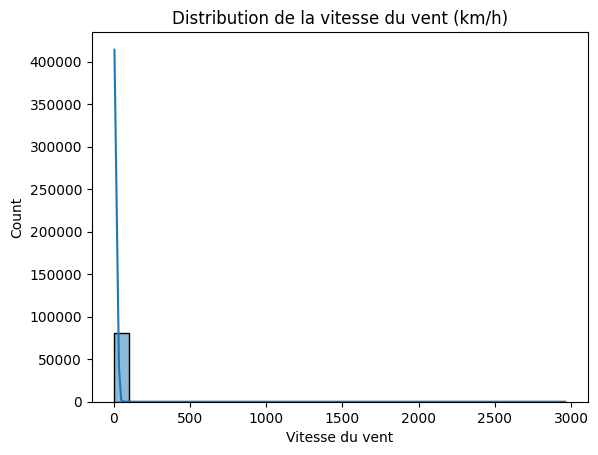

In [ ]:
# Histograme du vent dans les pays
sns.histplot(df["wind_kph"], bins=30, kde=True)
plt.title("Distribution de la vitesse du vent (km/h)")
plt.xlabel("Vitesse du vent")
plt.show()


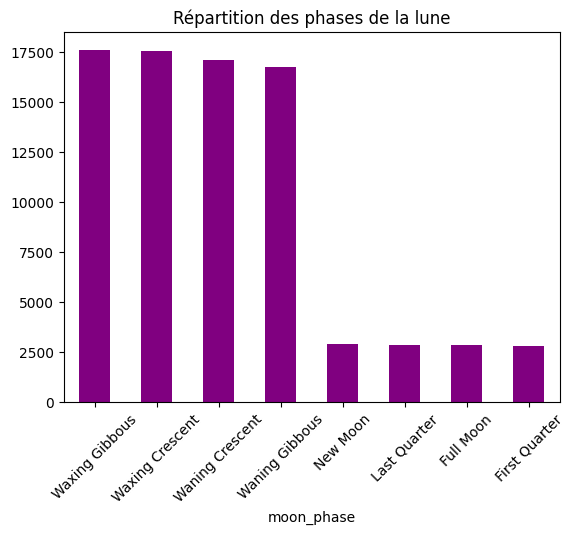

In [ ]:
# Répartition des phase de lune
df["moon_phase"].value_counts().plot(kind="bar", color="purple")
plt.title("Répartition des phases de la lune")
plt.xticks(rotation=45)
plt.show()


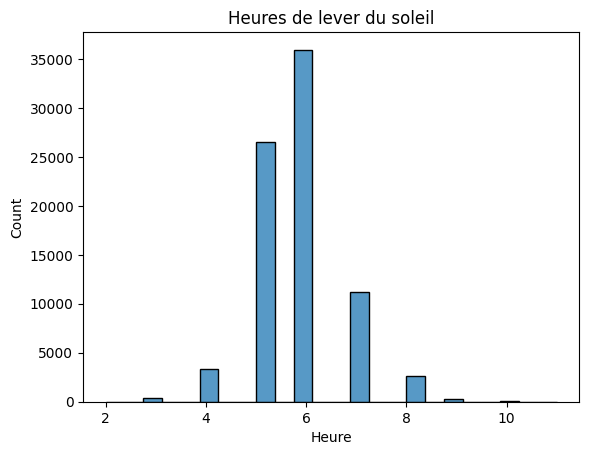

In [ ]:
# Les heures de lever du soleil
df["sunrise_hour"] = pd.to_datetime(df["sunrise"], format="%I:%M %p").dt.hour
sns.histplot(df["sunrise_hour"], bins=24)
plt.title("Heures de lever du soleil")
plt.xlabel("Heure")
plt.show()
